<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left">
<h3 align="left"><font color='#3498DB'>TensorFlow Probability </font></h3>

* 以下ではTensorFlow Probabilityで時系列分析を行うコードを紹介します。
* コードは公開されている以下のオンラインブックから引用しています。
* Martin Osvaldo A, Kumar Ravin; Lao Junpeng Bayesian Modeling and Computation in Python Boca Ratón, 2021. ISBN 978-0-367-89436-8
* https://bayesiancomputationbook.com/welcome.html

In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors
root = tfd.JointDistributionCoroutine.Root

import datetime
print(f"Last Run {datetime.datetime.now()}")

Last Run 2023-11-05 22:25:31.059181


In [2]:
az.style.use("arviz-grayscale")
plt.rcParams["figure.dpi"] = 300

In [4]:
co2_by_month = pd.read_csv("monthly_mauna_loa_co2.csv")
co2_by_month["date_month"] = pd.to_datetime(co2_by_month["date_month"])
co2_by_month["CO2"] = co2_by_month["CO2"].astype(np.float32)
co2_by_month.set_index("date_month", drop=True, inplace=True)

num_forecast_steps = 12 * 10 #過去のデータが与えられたときの直近10年の予測
co2_by_month_training_data = co2_by_month[:-num_forecast_steps]
co2_by_month_testing_data = co2_by_month[-num_forecast_steps:]


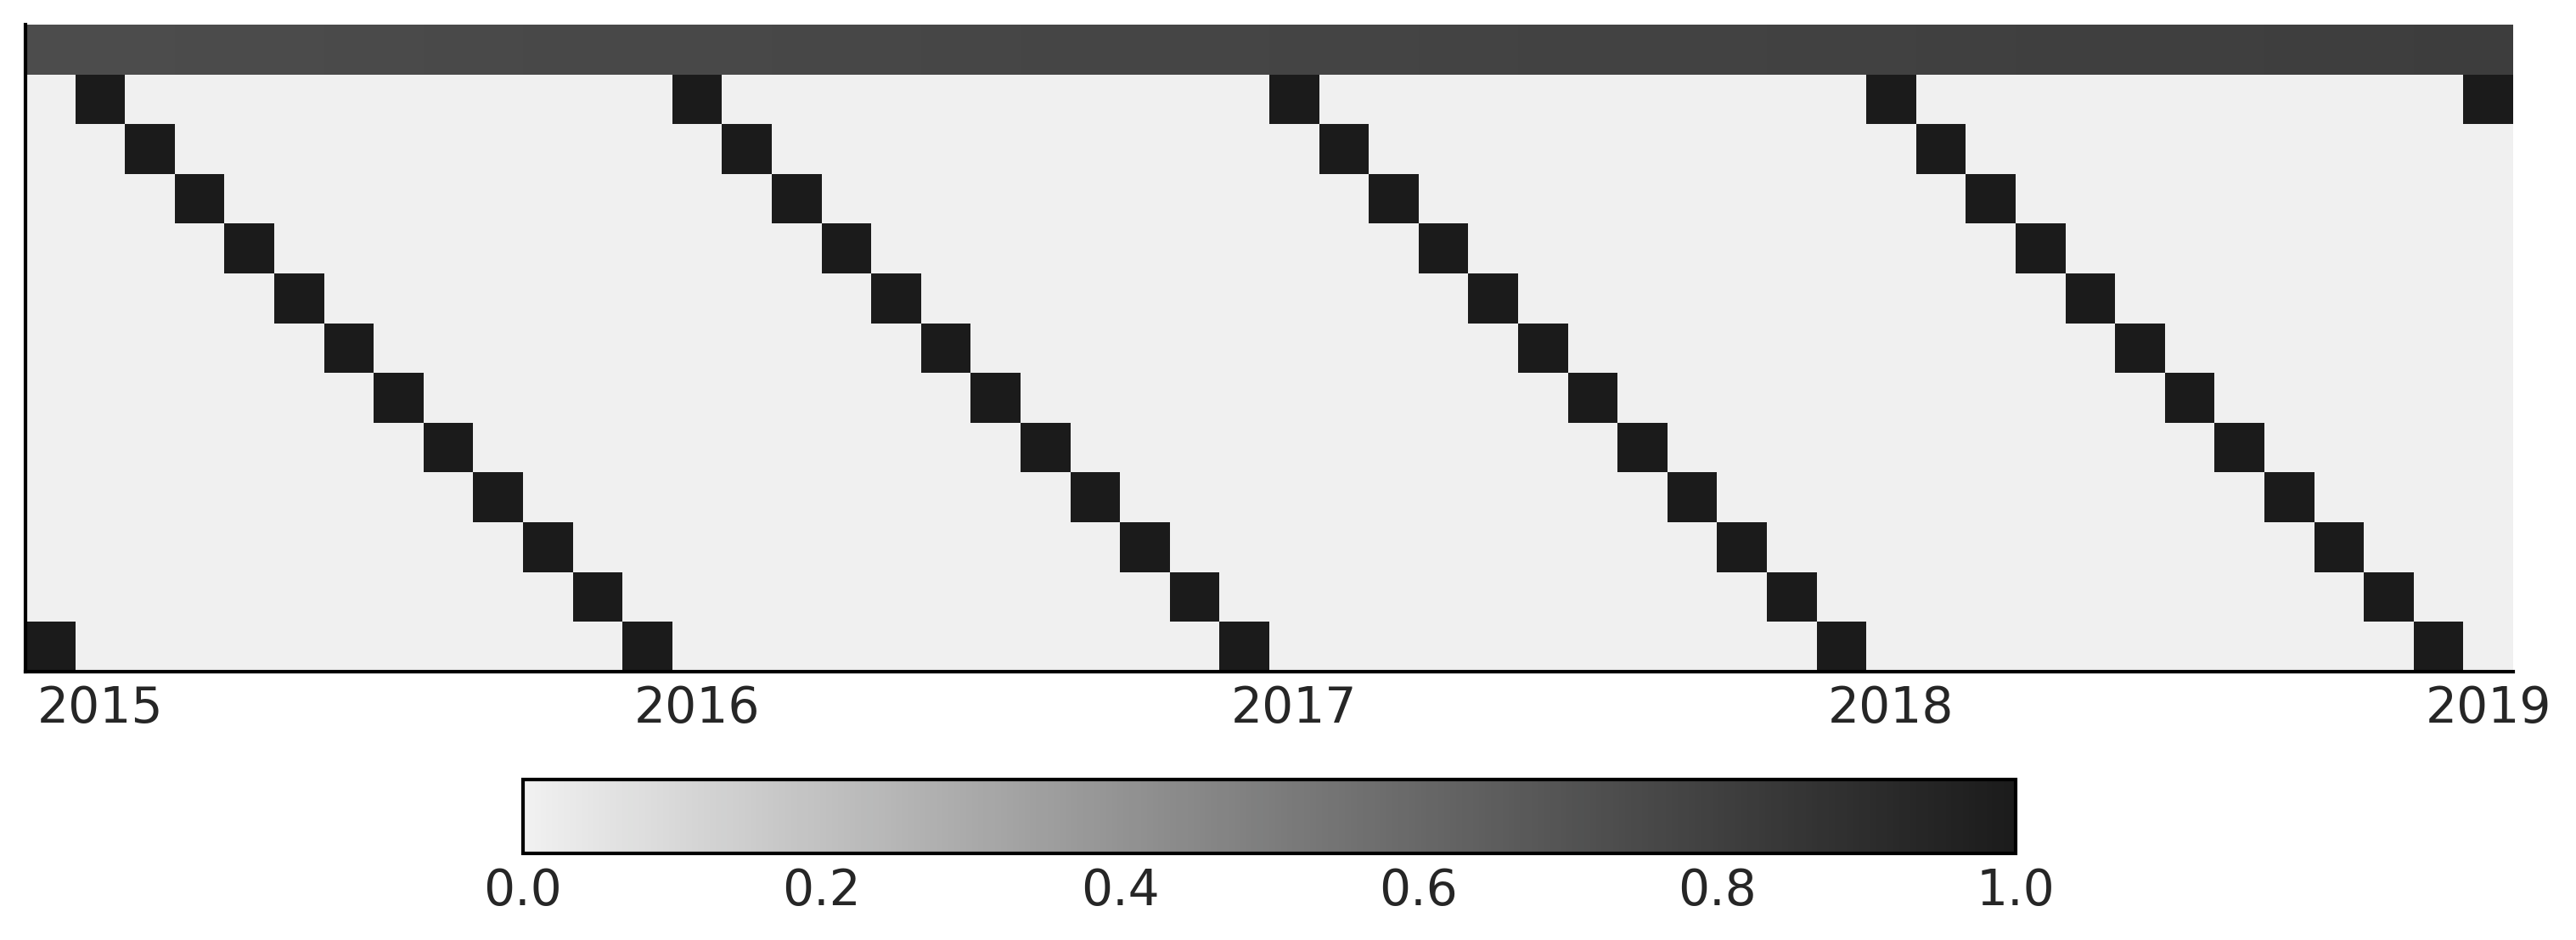

In [8]:
trend_all = np.linspace(0., 1., len(co2_by_month))[..., None]
trend_all = trend_all.astype(np.float32)
trend = trend_all[:-num_forecast_steps, :]

seasonality_all = pd.get_dummies(
    co2_by_month.index.month).values.astype(np.float32)
seasonality = seasonality_all[:-num_forecast_steps, :]

fig, ax = plt.subplots(figsize=(10, 4))
X_subset = np.concatenate([trend, seasonality], axis=-1)[-50:]
im = ax.imshow(X_subset.T, cmap="cet_gray_r")

label_loc = np.arange(1, 50, 12)
ax.set_xticks(label_loc)
ax.set_yticks([])
ax.set_xticklabels(co2_by_month.index.year[-50:][label_loc])
fig.colorbar(im, ax=ax, orientation="horizontal", shrink=.6)